![Handwritten Digits](handwritten_digits.png)

In [32]:
from sklearn import datasets, svm, metrics
import matplotlib.pyplot as plt

digits = datasets.load_digits()

## What's in the digits dataset?

In [2]:
print("Size of the digits dataset is: ", digits.data.shape)
print("The first digit in the dataset is", digits.target[0])
print("The first digit in the dataset has pixel intensities\n", digits.data[0])

Size of the digits dataset is:  (1797, 64)
The first digit in the dataset is 0
The first digit in the dataset has pixel intensities
 [  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]


## That looks complicated!
But this is what the computer "sees". How can we turn each matrix of pixel intensities into its corresponding number? In other words, how can we teach the computer to "read"?

## Learning from examples
Let's take a selection of examples from this dataset. We can use this to train a *classification model*, which will try to learn from the training examples how to map each matrix to the correct number.

In [33]:
num_samples = len(digits.data)
training_set_size = int(0.5 * num_samples)
X_training = digits.data[:training_set_size]
y_training = digits.target[:training_set_size]
X_test = digits.data[training_set_size:]
y_test = digits.target[training_set_size:]

In [42]:
classifier = svm.SVC(gamma=0.00001)
classifier.fit(X_training, y_training)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1e-05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Making predictions
Now that we've trained a classification model, let's make some predictions on the *test set*. These images are "unseen" by the model and so will allow us to get an idea as to its accuracy on new data.

In [43]:
expected = y_test
predicted = classifier.predict(X_test)
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 65 11  2  0  1  1  0  0 11]
 [ 1  0 74 11  0  0  0  0  0  0]
 [ 0  2  1 80  0  3  0  5  0  0]
 [ 3  1  1  0 84  1  0  2  0  0]
 [ 0  0  0 13  0 69  2  0  0  7]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  1  0  0  0  0 88  0  0]
 [ 0 23  6 15  1  9  1  1 27  5]
 [ 0  0  0 34  0  4  0  1  0 53]]


## Looks pretty good!
Let's have a look at some of the predictions themselves...

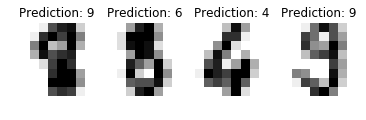

In [39]:
images_and_predictions = list(zip(digits.images[training_set_size:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(1, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

## Exercises

1. We've used the first half of the digits dataset to train the model. How would you use the first 70% instead? Why not use 100%?

2. The model we used is called a *support vector machine* (SVM). Notice that we set a parameter called *gamma* to 0.001 when creating the SVM model. Try changing this to different values (e.g. 0.1, 0.01, 0.0001, 0.00001) and seeing how it affects the model's accuracy. How would you decide on the best value for gamma?

3. scikit-learn makes it very easy to try different machine learning models. Let's try another model called *naive Bayes*. To do this, figure out where to put each of the following two lines to make this work. 

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets, svm, metrics

import matplotlib.pyplot as plt

digits = datasets.load_digits()

In [10]:
num_samples = len(digits.data)
training_set_size = int(0.9 * num_samples)
X_training = digits.data[:training_set_size]
y_training = digits.target[:training_set_size]
X_test = digits.data[training_set_size:]
y_test = digits.target[training_set_size:]

In [11]:
classifier = GaussianNB()
classifier.fit(X_training, y_training)

GaussianNB(priors=None)

In [12]:
expected = y_test
predicted = classifier.predict(X_test)
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Confusion matrix:
[[16  0  0  0  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0  3  0]
 [ 0  0 13  0  0  0  1  0  3  0]
 [ 0  0  0  8  0  4  0  1  5  0]
 [ 0  0  0  0 16  0  0  4  0  0]
 [ 0  1  0  0  0 16  0  1  0  0]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  0  1  0  0  1  0 16  1  0]
 [ 0  2  0  0  0  0  0  2 13  0]
 [ 0  1  0  0  0  1  0  2  0 14]]


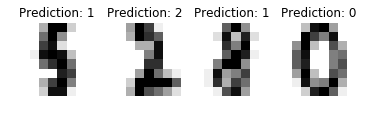

In [13]:
images_and_predictions = list(zip(digits.images[training_set_size:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(1, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()